# Data for the Project

## This Notebook handles the following steps regarding data for our Capstone Project

### I Downloading Data from `file_list.json`  provided by Udacity to get a subset of the data
### II Train-Test-Validation Split 
### III Data Distribution Visualisation and Exploration
### IV New Data addition and Re-Split for removing Class Imbalance
### V Image Data Visualisation and Exploration for Transformations

## Step I: Downloading subset of Amazon Bin Dataset 


In [5]:
import os
import json
import boto3
from tqdm import tqdm

def download_and_arrange_data():
    s3_client = boto3.client('s3')

    with open('file_list.json', 'r') as f:
        d=json.load(f)

    for k, v in d.items():
        print(f"Downloading Images with {k} objects")
        directory=os.path.join('train_data', k)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for file_path in tqdm(v):
            file_name=os.path.basename(file_path).split('.')[0]+'.jpg'
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', file_name),
                             os.path.join(directory, file_name))

# download_and_arrange_data() used to download data

In [10]:
total_num = 0
for c in d:
    total_num+=len(d[c])
    

### Total Number of Files in subset

In [11]:
total_num

10441

### Visualising Current Class Distribution in Subset

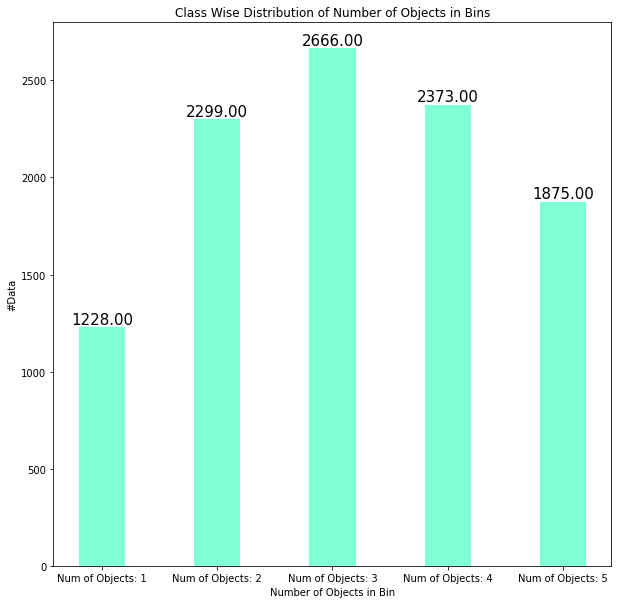

In [12]:
import numpy as np
import matplotlib.pyplot as plt
   
num_objects = [("Num of Objects: " + k) for k in d.keys()]
values = [len(v) for v in d.values()]
  
fig, ax =  plt.subplots(figsize = (10, 10))
 
# creating the bar plot
ax.bar(num_objects, values, color ='aquamarine',
        width = 0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
 
plt.xlabel("Number of Objects in Bin")
plt.ylabel("#Data")
plt.title("Class Wise Distribution of Number of Objects in Bins")
plt.show()

## Step II: Train-Validation-Test Split

1. We take **100 Images from each Class, randomly, for our Test Data**
- For each class, we use the file_list.json to randomly sample 100 of them as test data
- Remaining items are going to be used for the Train-Validation Split

2. For the remaining data, we first create a dataframe with file names and class wise labels, so we can use SK Learn's Train-Test Split function
- We use stratify by the class, to ensure that the class distribution remains same in both train and validation data
- We do a **80-20 Train-Validation Split**

### Sampling 100 images from each class for Test Set

In [7]:
import random

test_1 = set(random.sample(d['1'], 100))
test_2 = set(random.sample(d['2'], 100))
test_3 = set(random.sample(d['3'], 100))
test_4 = set(random.sample(d['4'], 100))
test_5 = set(random.sample(d['5'], 100))

all_1 = set(d['1'])
all_1 = set(d['1'])
all_3 = set(d['3'])
all_4 = set(d['4'])
all_5 = set(d['5'])

left_1 = all_1.difference(test_1)
left_2 = all_2.difference(test_2)
left_3 = all_3.difference(test_3)
left_4 = all_4.difference(test_4)
left_5 = all_5.difference(test_5)

In [67]:
# Checking if Sampled Correctly
# len(all) - len(left) shold be 100


len(all_1) - len(left_1)
len(all_2) - len(left_2)
len(all_3) - len(left_3)
len(all_4) - len(left_4)
len(all_5) - len(left_5)

100

In [36]:
# left_class.intersection(test_class) should be an empty set
# Hence proves sampled correctly 

left_1.intersection(test_1)
left_2.intersection(test_2)
left_3.intersection(test_3)
left_4.intersection(test_4)
left_5.intersection(test_5)

set()

### Get the Identifier Numbers from the Files for Creating Test Set from Image Files

In [37]:
file_prefix = len("data/metadata/")
file_suffix = len(".json")

In [44]:
test_1_id = []
for t in test_1:
    #print(t[file_prefix:][:-file_suffix])
    test_1_id.append(t[file_prefix:][:-file_suffix])
 
test_2_id = []
for t in test_2:
    #print(t[file_prefix:][:-file_suffix])
    test_2_id.append(t[file_prefix:][:-file_suffix])
    
test_3_id = []
for t in test_3:
    #print(t[file_prefix:][:-file_suffix])
    test_3_id.append(t[file_prefix:][:-file_suffix])
    

test_4_id = []
for t in test_4:
    #print(t[file_prefix:][:-file_suffix])
    test_4_id.append(t[file_prefix:][:-file_suffix])
    
test_5_id = []
for t in test_5:
    #print(t[file_prefix:][:-file_suffix])
    test_5_id.append(t[file_prefix:][:-file_suffix])
    
    

### Moving files to Test Folder

In [50]:
import shutil

for img in test_1_id:
    current_path = os.path.join("train_data/1/", img + ".jpg")
    test_path = os.path.join("test_data/1/", img + ".jpg")
    shutil.move(current_path, test_path)

for img in test_2_id:
    current_path = os.path.join("train_data/2/", img + ".jpg")
    test_path = os.path.join("test_data/2/", img + ".jpg")
    shutil.move(current_path, test_path)
    
for img in test_3_id:
    current_path = os.path.join("train_data/3/", img + ".jpg")
    test_path = os.path.join("test_data/3/", img + ".jpg")
    shutil.move(current_path, test_path)
    
for img in test_4_id:
    current_path = os.path.join("train_data/4/", img + ".jpg")
    test_path = os.path.join("test_data/4/", img + ".jpg")
    shutil.move(current_path, test_path)
    
for img in test_5_id:
    current_path = os.path.join("train_data/5/", img + ".jpg")
    test_path = os.path.join("test_data/5/", img + ".jpg")
    shutil.move(current_path, test_path)
  

### Splitting the Remaining Data into Train and Validation Split

In [86]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [87]:
train_df_1 = pd.DataFrame(left_1, columns = ["File Name"])
train_df_1["Class"] = 1

train_df_2 = pd.DataFrame(left_2, columns = ["File Name"])
train_df_2["Class"] = 2

train_df_3 = pd.DataFrame(left_3, columns = ["File Name"])
train_df_3["Class"] = 3

train_df_4 = pd.DataFrame(left_4, columns = ["File Name"])
train_df_4["Class"] = 4

train_df_5 = pd.DataFrame(left_5, columns = ["File Name"])
train_df_5["Class"] = 5



In [110]:
train_val_data = train_df_1.append(train_df_2, ignore_index=True).append(train_df_3, ignore_index=True).append(train_df_4, ignore_index=True).append(train_df_5, ignore_index=True)

In [111]:
#Contains all Class Data to be Split
train_val_data

File Name  Class
0      data/metadata/10394.json      1
1      data/metadata/08110.json      1
2      data/metadata/03037.json      1
3     data/metadata/102900.json      1
4      data/metadata/06980.json      1
...                         ...    ...
9936    data/metadata/1047.json      5
9937  data/metadata/100167.json      5
9938   data/metadata/00254.json      5
9939  data/metadata/100254.json      5
9940   data/metadata/07500.json      5

[9941 rows x 2 columns]

In [112]:
X = train_val_data["File Name"]
y = train_val_data["Class"]

### Performing a Stratified Split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [125]:
Final_Train = pd.DataFrame(X_train)

In [127]:
Final_Train["Labels"] = y_train

In [133]:
Final_Valid = pd.DataFrame(X_test)

In [134]:
Final_Valid["Labels"] = y_test

In [141]:
Final_Valid = Final_Valid.reset_index(drop=True)

### Train and Validation Images in Separate Folders

In [55]:
for i in range(len(Final_Valid)):
    #print(Final_Valid["File Name"][i])
    file_class = str(Final_Valid["Labels"][i])
    file_name = Final_Valid["File Name"][i][file_prefix:][:-file_suffix]
    current_path = os.path.join("train_data/", file_class+"/",file_name + ".jpg")
    test_path = os.path.join("valid_data/", file_class+"/",file_name + ".jpg")
    shutil.move(current_path, test_path)
    print(current_path)
    print(test_path)

## Step III: Data Distribution Visualisation and Exploration

### Getting the Current Train-Test-Validation Data Details

In [56]:
import os

train_data = {}
test_data = {}
valid_data = {}

In [57]:
for i in range(1, 6):
    train_path = os.path.join("train_data/", str(i))
    for root, directories, files in os.walk(train_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        train_data[i] = files
        
    test_path = os.path.join("test_data/", str(i))
    for root, directories, files in os.walk(test_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        test_data[i] = files
        
    valid_path = os.path.join("valid_data/", str(i))
    for root, directories, files in os.walk(valid_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        valid_data[i] = files
        

### Visualising Current Train-Validation-Test Data Split %

In [58]:
num_train = sum([len(v) for k, v in train_data.items()])
num_test = sum([len(v) for k, v in test_data.items()])
num_valid = sum([len(v) for k, v in valid_data.items()])

In [127]:
total_num == (num_train + num_test + num_valid)

True

In [65]:
train_perc = num_train/total_num
test_perc = num_test/total_num
valid_perc = num_valid/total_num


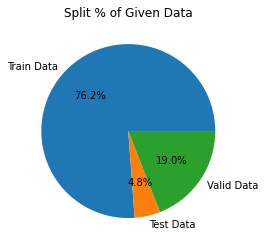

In [75]:
import numpy as np

y = np.array([train_perc, test_perc, valid_perc])
mylabels = ["Train Data", "Test Data", "Valid Data"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.title("Split % of Given Data")
plt.show() 

### Train and Validation Data Distribution Comparision

- Since we stratified the train-validation split, let's compare and see the class distributions
- **Stratification ensures that the proportions of classes remains same in both train and validation sets**

In [79]:
train_perc_1 = len(train_data[1])/num_train
train_perc_2 = len(train_data[2])/num_train
train_perc_3 = len(train_data[3])/num_train
train_perc_4 = len(train_data[4])/num_train
train_perc_5 = len(train_data[5])/num_train


In [80]:
valid_perc_1 = len(valid_data[1])/num_valid
valid_perc_2 = len(valid_data[2])/num_valid
valid_perc_3 = len(valid_data[3])/num_valid
valid_perc_4 = len(valid_data[4])/num_valid
valid_perc_5 = len(valid_data[5])/num_valid



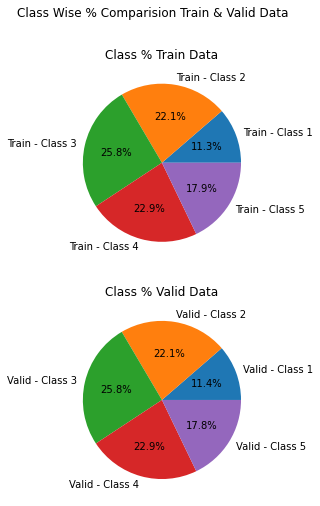

In [94]:
fig, ax =  plt.subplots(2,figsize = (10, 8))
y = np.array([train_perc_1, train_perc_2, train_perc_3,train_perc_4, train_perc_5])
mylabels = ["Train - Class 1", "Train - Class 2", "Train - Class 3", "Train - Class 4", "Train - Class 5"]

ax[0].pie(y, labels = mylabels,autopct='%1.1f%%')
ax[0].set_title("Class % Train Data")

y2 = np.array([valid_perc_1, valid_perc_2, valid_perc_3,valid_perc_4, valid_perc_5])
mylabels2 = ["Valid - Class 1", "Valid - Class 2", "Valid - Class 3", "Valid - Class 4", "Valid - Class 5"]

ax[1].pie(y2, labels = mylabels2,autopct='%1.1f%%')
ax[1].set_title("Class % Valid Data")

fig.suptitle("Class Wise % Comparision Train & Valid Data")
plt.show()

### We see that the Class Wise % in both Train and Validation is almost the same, thus data is a stratified split

- This is important as without that, we cannot fully rely on the Validation Details, since the data distribution changes
- Therefore, now since the Distribution is almost the same, Validation Set is reliable

### Class Wise Distribution in Training and Validation Data

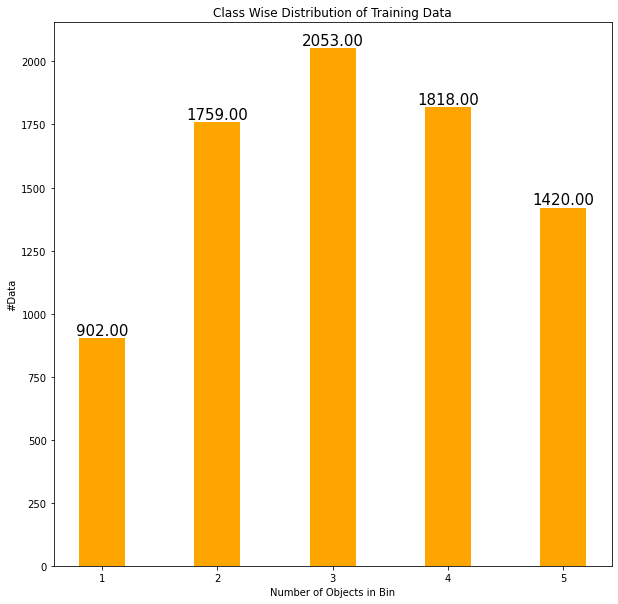

In [102]:
import matplotlib.pyplot as plt
   
num_objects = [(str(k)) for k in train_data.keys()]
values = [len(v) for v in train_data.values()]
  
fig, ax =  plt.subplots(figsize = (10, 10))
 
# creating the bar plot
ax.bar(num_objects, values, color ='orange',
        width = 0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
 
plt.xlabel("Number of Objects in Bin")
plt.ylabel("#Data")
plt.title("Class Wise Distribution of Training Data")
plt.show()

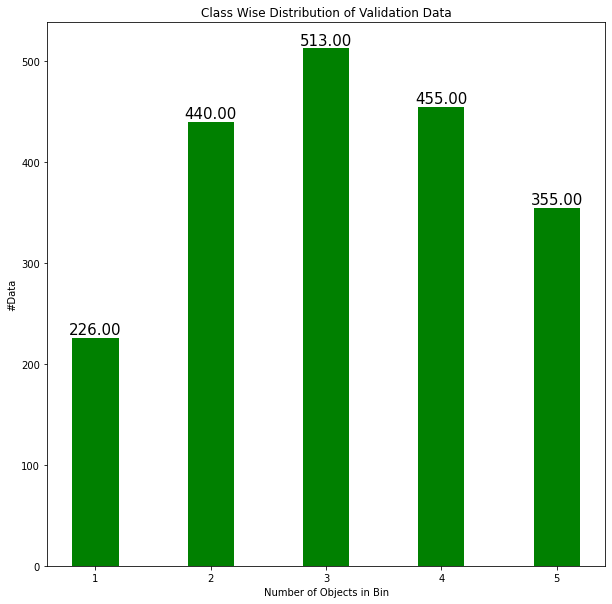

In [128]:
import matplotlib.pyplot as plt
   
num_objects = [(str(k)) for k in valid_data.keys()]
values = [len(v) for v in valid_data.values()]
  
fig, ax =  plt.subplots(figsize = (10, 10))
 
# creating the bar plot
ax.bar(num_objects, values, color ='green',
        width = 0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
 
plt.xlabel("Number of Objects in Bin")
plt.ylabel("#Data")
plt.title("Class Wise Distribution of Validation Data")
plt.show()

### From the Above Distribtions, we see a big difference in the Data in Class 3 vs All other classes 

- **Since there is an Imbalance of Classes, there is a high chance for a model to learn to only predict Majority Class**
- **We need to test this data with a basic model, to see if the model is able to learn other classes or not!**

### Since felt that Classes are Imbalanced, fine tuned a pre-trained ResNet-50 Model for 5 epochs
- **Imbalance is leading to Model only predicting Class 3**
- Loss decreases since Class 3 is dominating, but **final test accuracy is poor, since all classes balanced (100 each)**
- Decide to Balance all Class Data

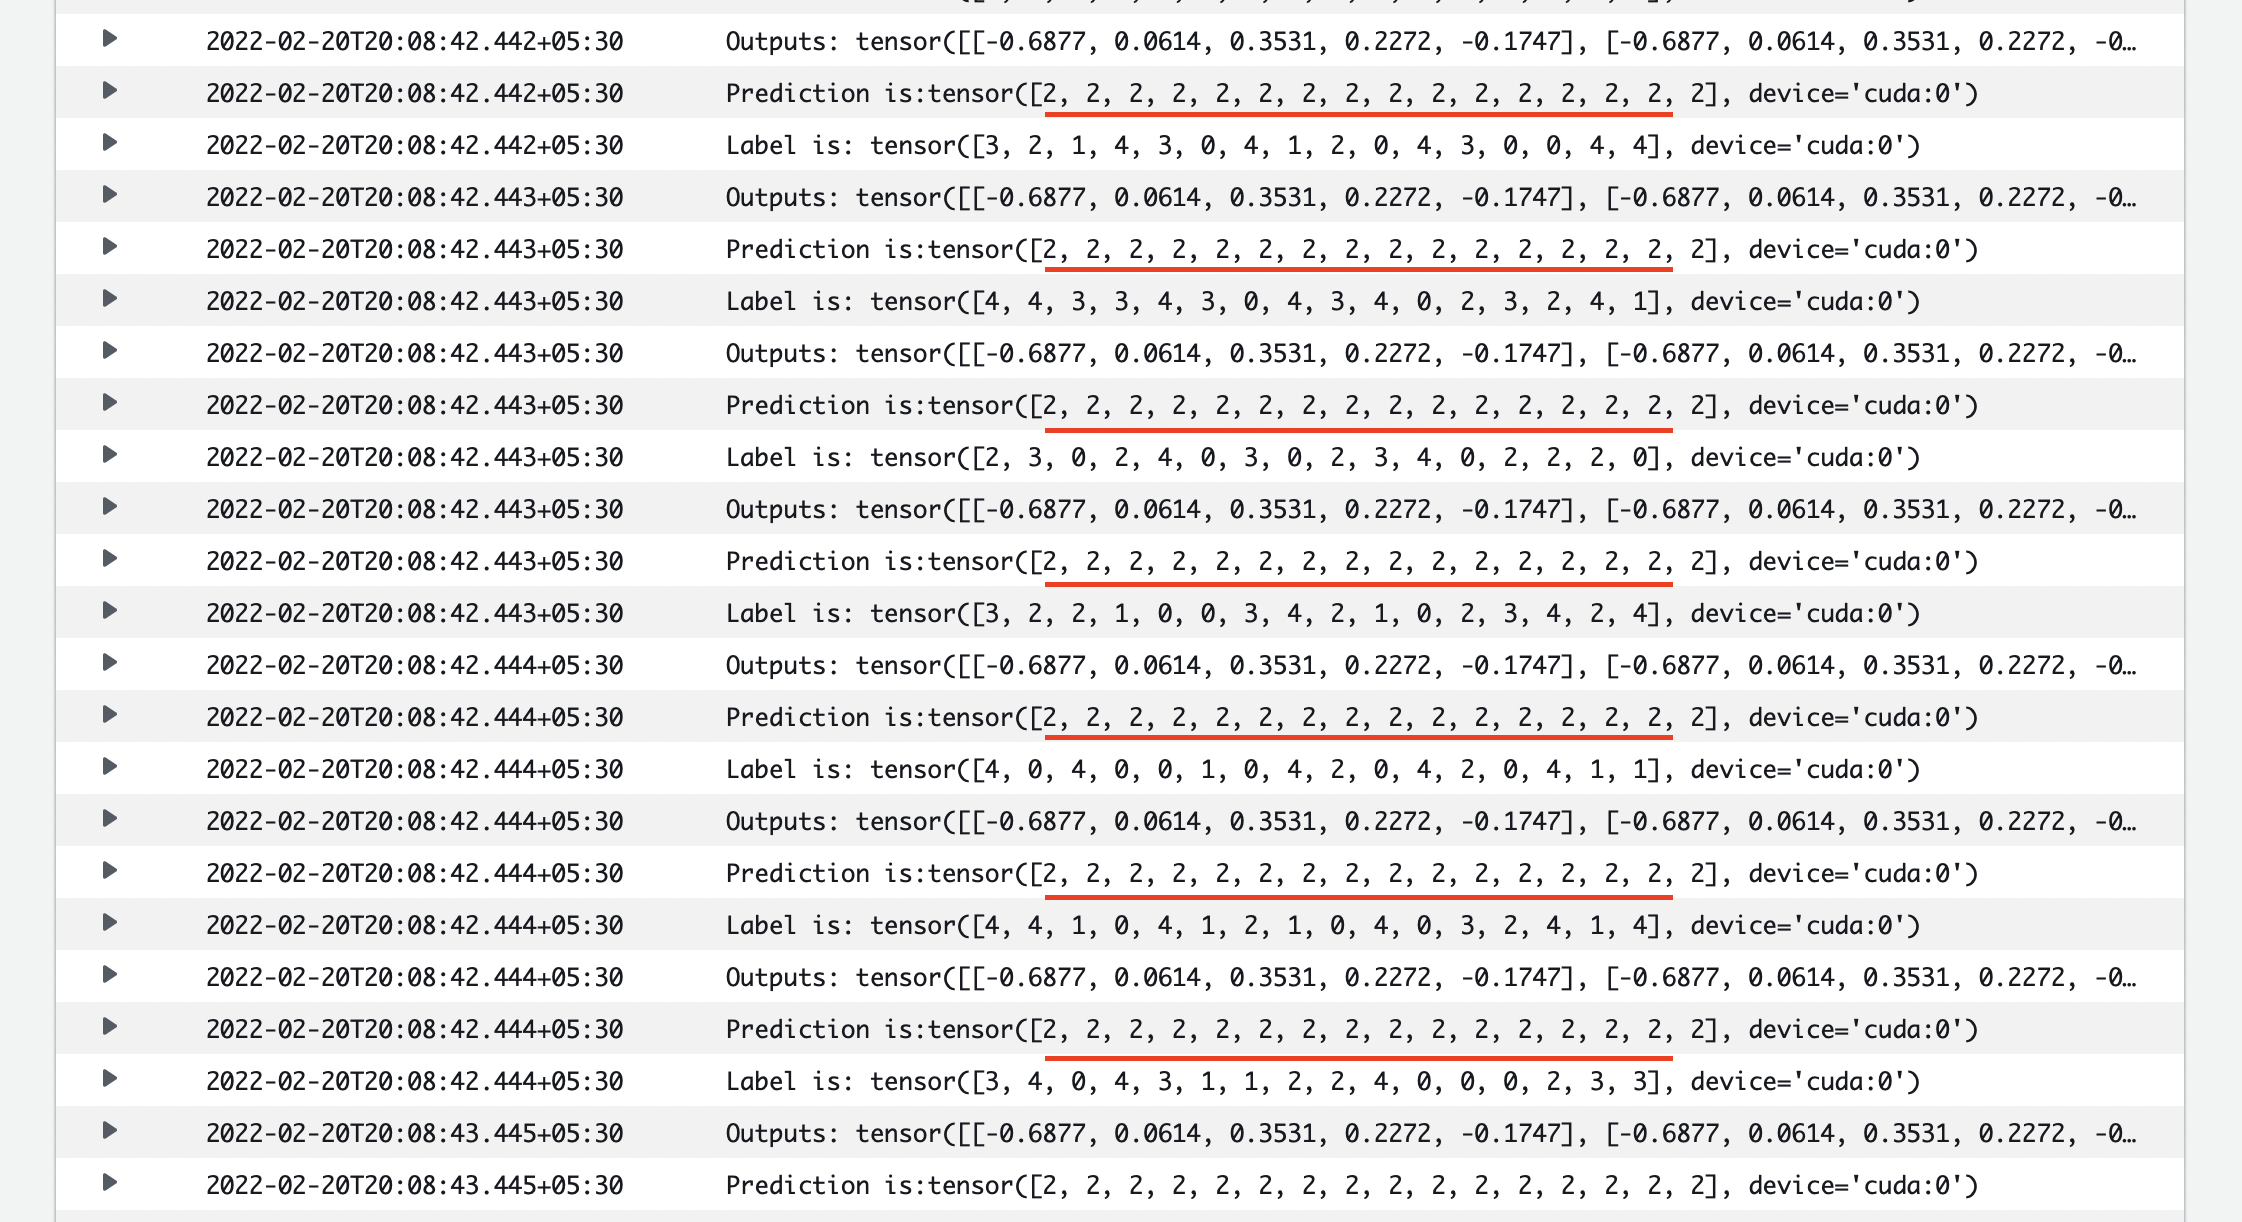

### Therefore we need more data for Classes 1, 2, 4 and 5 to balance out all Classes



## Step IV: New Data addition and Re-Split for removing Class Imbalance

- I made `Get_More_Data_Script.ipynb` for getting more data from Amazon Bin Image Dataset
- We get exactly same amount of data to balance out all Classes
- Run `Get_More_Data_Script.ipynb` to generate a New Folder `new_data` which has our new data

### Adding New Data generated from Script to existing Train and Validation

In [38]:
import os
import random
import shutil

new_train_data = {}

In [18]:
for i in range(1, 6):
    if(i==3):
        continue
    train_path = os.path.join("new_data/", str(i)+"/", "train")
    print(train_path)
    for root, directories, files in os.walk(train_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        new_train_data[i] = files
     

new_data/1/train
new_data/2/train
new_data/4/train
new_data/5/train


In [31]:
valid_class_1 = random.sample(new_train_data[1], 287)
valid_class_2 = random.sample(new_train_data[2], 73)
valid_class_4 = random.sample(new_train_data[4], 58)
valid_class_5 = random.sample(new_train_data[5], 158)

In [40]:
for i in range(len(valid_class_1)):
    file_name = valid_class_1[i]
    current_path = os.path.join("New_Data/1/train/", file_name)
    new_path = os.path.join("New_Data/1/valid/", file_name)
    shutil.move(current_path, new_path)
    #print(current_path)
    #print(new_path)
    
for i in range(len(valid_class_2)):
    file_name = valid_class_2[i]
    current_path = os.path.join("New_Data/2/train/", file_name)
    new_path = os.path.join("New_Data/2/valid/", file_name)
    shutil.move(current_path, new_path)
    #print(current_path)
    #print(new_path)
    
for i in range(len(valid_class_4)):
    file_name = valid_class_4[i]
    current_path = os.path.join("New_Data/4/train/", file_name)
    new_path = os.path.join("New_Data/4/valid/", file_name)
    shutil.move(current_path, new_path)
    #print(current_path)
    #print(new_path)
    
for i in range(len(valid_class_5)):
    file_name = valid_class_5[i]
    current_path = os.path.join("New_Data/5/train/", file_name)
    new_path = os.path.join("New_Data/5/valid/", file_name)
    shutil.move(current_path, new_path)
    #print(current_path)
    #print(new_path)

### Checking if moved correctly

In [45]:
moved_train = {}
moved_valid = {}

for i in range(1, 6):
    if(i==3):
        continue
    train_path = os.path.join("New_Data/", str(i)+"/", "train")
    for root, directories, files in os.walk(train_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        moved_train[i] = files
        
   
    valid_path = os.path.join("New_Data/", str(i)+"/", "valid")
    for root, directories, files in os.walk(valid_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        moved_valid[i] = files
        

### New Data Added Successfully to Balance out Classes!

## Data Distribution Visualisation after adding New Data

In [1]:
import os

train_data = {}
test_data = {}
valid_data = {}

In [2]:
for i in range(1, 6):
    train_path = os.path.join("train_data/", str(i))
    for root, directories, files in os.walk(train_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        train_data[i] = files
        
    test_path = os.path.join("test_data/", str(i))
    for root, directories, files in os.walk(test_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        test_data[i] = files
        
    valid_path = os.path.join("valid_data/", str(i))
    for root, directories, files in os.walk(valid_path):
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        valid_data[i] = files
        

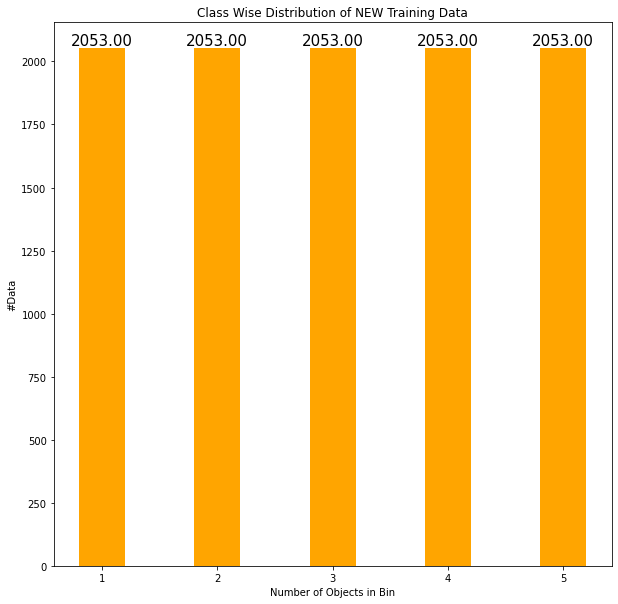

In [4]:
import matplotlib.pyplot as plt
   
num_objects = [(str(k)) for k in train_data.keys()]
values = [len(v) for v in train_data.values()]
  
fig, ax =  plt.subplots(figsize = (10, 10))
 
# creating the bar plot
ax.bar(num_objects, values, color ='orange',
        width = 0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
 
plt.xlabel("Number of Objects in Bin")
plt.ylabel("#Data")
plt.title("Class Wise Distribution of NEW Training Data")
plt.show()

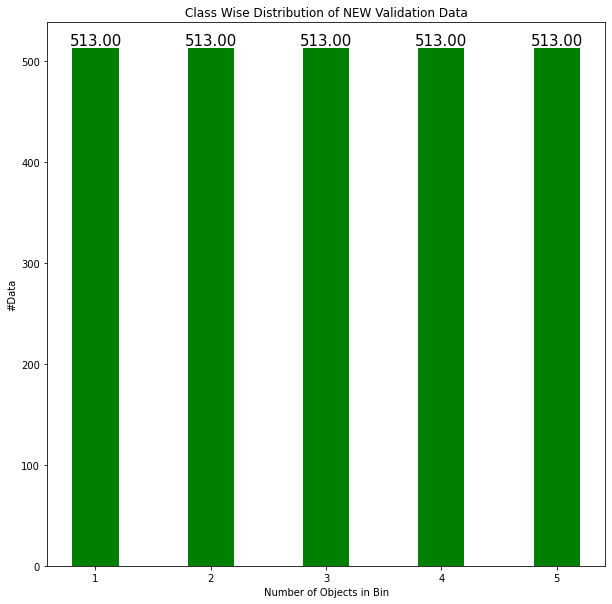

In [5]:
import matplotlib.pyplot as plt
   
num_objects = [(str(k)) for k in valid_data.keys()]
values = [len(v) for v in valid_data.values()]
  
fig, ax =  plt.subplots(figsize = (10, 10))
 
# creating the bar plot
ax.bar(num_objects, values, color ='green',
        width = 0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
 
plt.xlabel("Number of Objects in Bin")
plt.ylabel("#Data")
plt.title("Class Wise Distribution of NEW Validation Data")
plt.show()

### Since both Training and Validation data have same number of examples for all classes, the train-validation split is still stratified

In [6]:
num_train = sum([len(v) for k, v in train_data.items()])
num_test = sum([len(v) for k, v in test_data.items()])
num_valid = sum([len(v) for k, v in valid_data.items()])

In [7]:
total_num = (num_train + num_test + num_valid)

In [8]:
train_perc = num_train/total_num
test_perc = num_test/total_num
valid_perc = num_valid/total_num



### Total Data Split % after addition

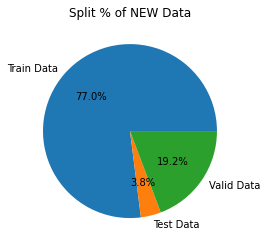

In [9]:
import numpy as np

y = np.array([train_perc, test_perc, valid_perc])
mylabels = ["Train Data", "Test Data", "Valid Data"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.title("Split % of NEW Data")
plt.show() 

## Step V: Image Data Visualisation and Exploration for Transformations

### Visualising Images from each Class - COMPLETE IT

- First to validate if they make sensee - have those many objects
- Analyse to see what kind of transformations are required
    - Will crop to a standard size
    - Horizontal Flips can make sense
        - SEE IF PREV NB CODE HAVE ANY OTHER TRANSFORMS
 
- Can we as humans identify them with ease - EXPLAIN that tasks where humans perform well, machine may or may not perform as well, but if humans perform bad, indicator that could be difficult for models to learn too
    - Images are a bit dark
    - Net holding them in place
    - Sometimes '1' object could be a bunndle of smaller ones
    - More than 2 Objects starts becoming difficult to identify even for Humans
        - How Machines can spot patterns Humans cannot

In [105]:
from PIL import Image
import random

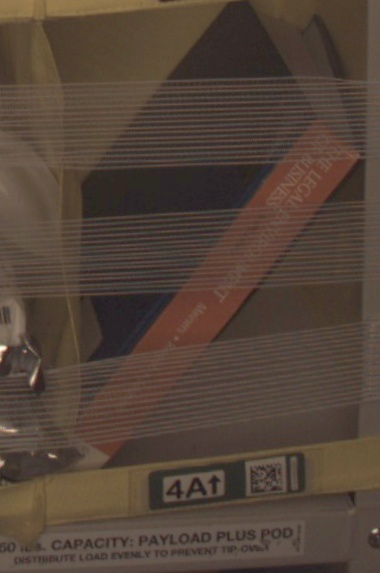

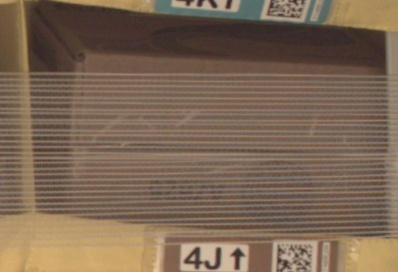

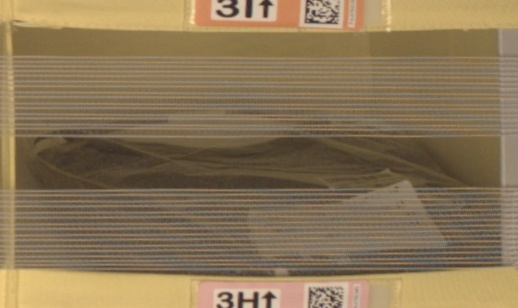

In [120]:
class1_images = random.sample(train_data[1], 3)

for im in class1_images:
    img_path = os.path.join("train_data/1/", im)
    tst_im = Image.open(img_path)
    display(tst_im)

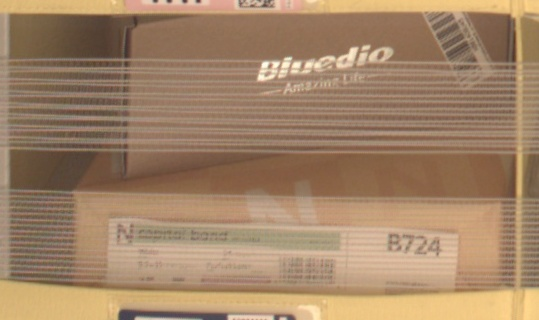

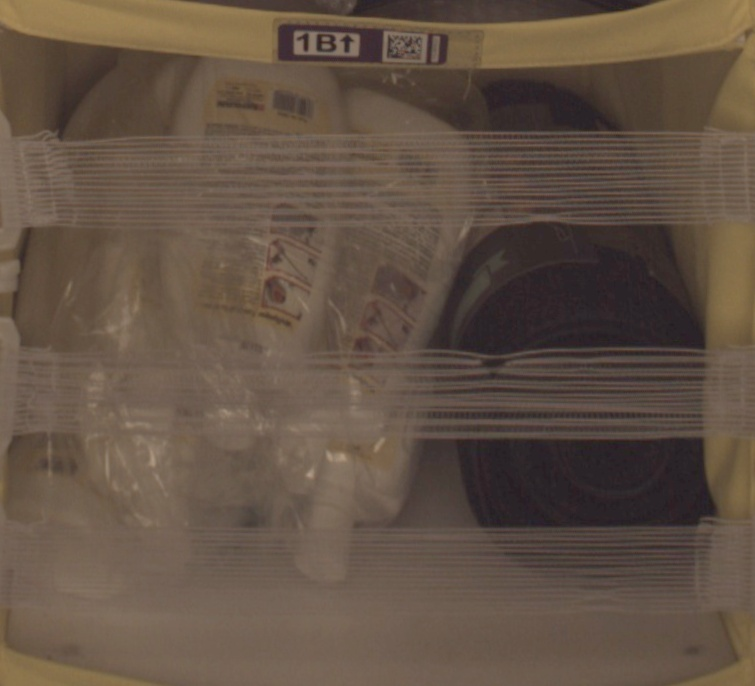

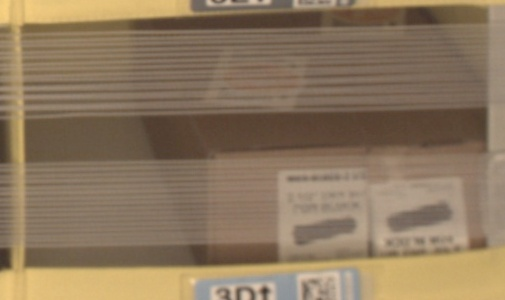

In [121]:
class2_images = random.sample(train_data[2], 3)

for im in class2_images:
    img_path = os.path.join("train_data/2/", im)
    tst_im = Image.open(img_path)
    display(tst_im)

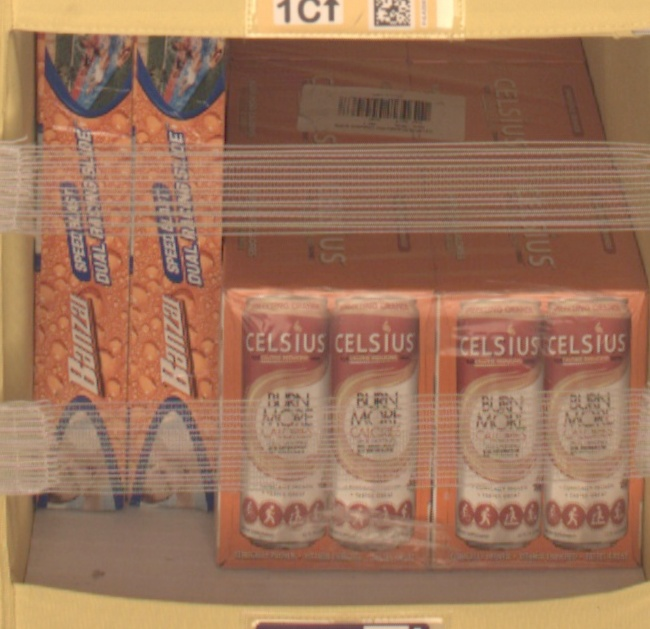

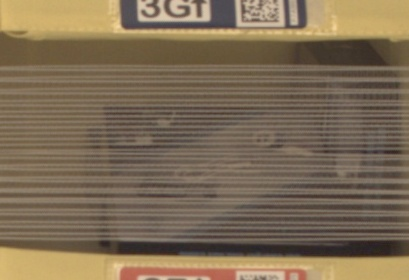

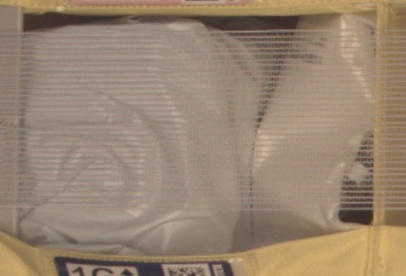

In [125]:
class3_images = random.sample(train_data[3], 3)

for im in class3_images:
    img_path = os.path.join("train_data/3/", im)
    tst_im = Image.open(img_path)
    display(tst_im)

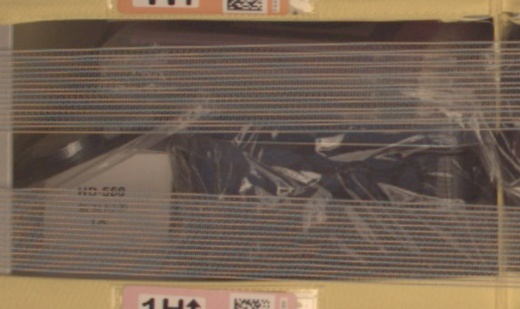

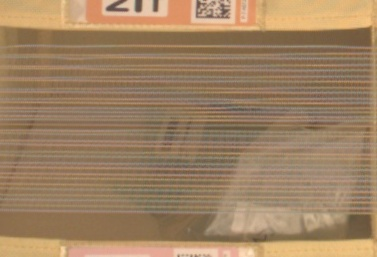

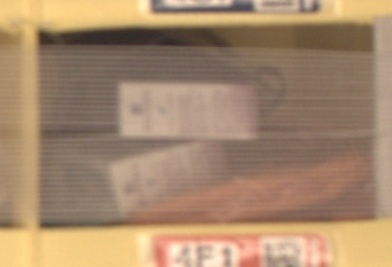

In [124]:
class4_images = random.sample(train_data[4], 3)

for im in class4_images:
    img_path = os.path.join("train_data/4/", im)
    tst_im = Image.open(img_path)
    display(tst_im)

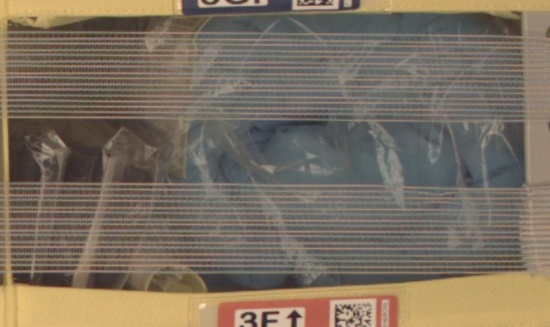

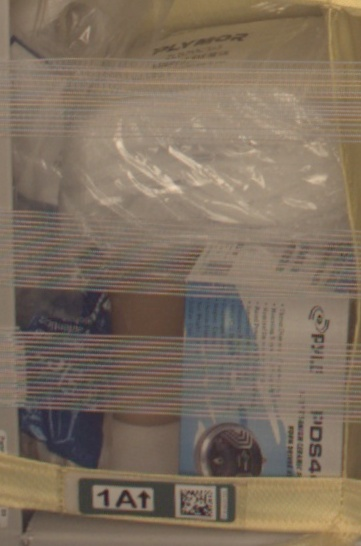

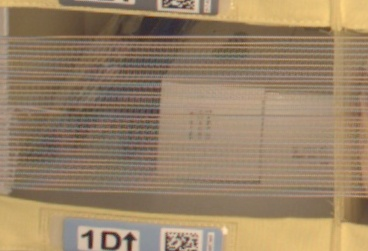

In [126]:
class5_images = random.sample(train_data[5], 3)

for im in class5_images:
    img_path = os.path.join("train_data/5/", im)
    tst_im = Image.open(img_path)
    display(tst_im)